<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion/blob/main/KNN_Ejemplo_Clasificacion_2D_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Vecinos más Cercanos (KNN)
Este notebook explora el uso de KNN para clasificación binaria con datos simulados.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Crear datos simulados
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# Evaluación
print("Precisión KNN:", accuracy_score(y_test, modelo_knn.predict(X_test)))


Precisión KNN: 1.0


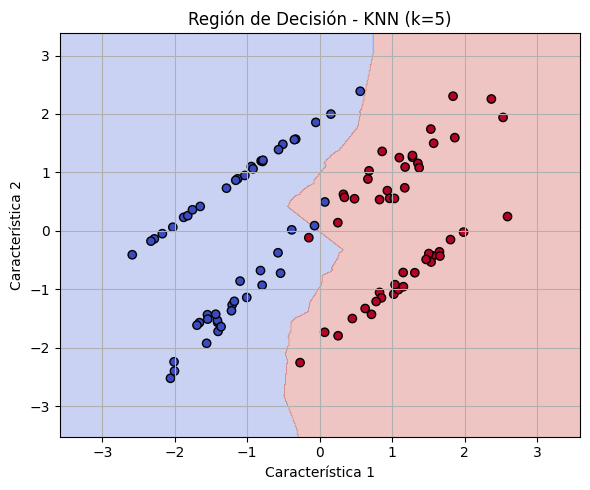

In [2]:
# Visualización de regiones de decisión 2D
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = modelo_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Región de Decisión - KNN (k=5)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.tight_layout()
plt.show()


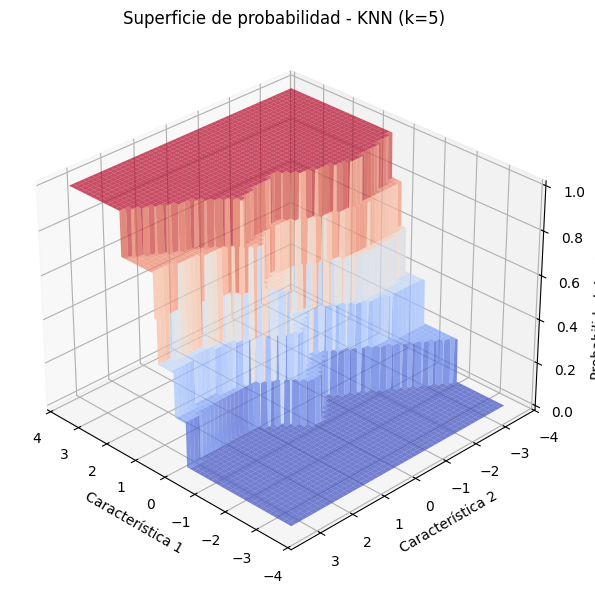

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Función de decisión en 3D
Z_3d = modelo_knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_3d = Z_3d.reshape(xx.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z_3d, cmap=cm.coolwarm, edgecolor='none', alpha=0.7)
ax.set_title("Superficie de probabilidad - KNN (k=5)")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")
ax.set_zlabel("Probabilidad de clase 1")
ax.view_init(elev=30, azim=135)
plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre KNN

- KNN es un algoritmo muy **intuitivo y efectivo** para problemas simples de clasificación.
- En este ejemplo con `k=5`, el modelo logra una buena precisión con una frontera de decisión suave.
- La visualización 3D muestra cómo varía la **probabilidad de pertenecer a una clase** según la ubicación.
- Es ideal para empezar en clasificación, pero sufre con muchos datos o muchas dimensiones (alto costo en predicción).
